# Basic Plots and EDA

In [1]:
###############################################
###                Imports                  ###
###############################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

# Dataframe: Full data imputed (hourly)

In [2]:
###############################################
###             Read the data               ###
###############################################

date = lambda x: pd.datetime.strptime(x, "%Y-%m-%dT%H:%M")
df = pd.read_csv('../processed_data/full_data_imputed.csv', parse_dates = ["Datum"], date_parser = date)

print(df['Datum'][1])

df.info()
df.describe()

2007-01-01 01:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128443 entries, 0 to 128442
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Jahr           128443 non-null  int64         
 1   Monat          128443 non-null  int64         
 2   Tag            128443 non-null  int64         
 3   Zeit           128443 non-null  object        
 4   Datum          128443 non-null  datetime64[ns]
 5   Zweirad        128443 non-null  int64         
 6   Personenwagen  128443 non-null  int64         
 7   Lastwagen      128443 non-null  int64         
 8   Hr             128443 non-null  float64       
 9   RainDur        128443 non-null  float64       
 10  T              128443 non-null  float64       
 11  WVs            128443 non-null  float64       
 12  StrGlo         128443 non-null  float64       
 13  p              128443 non-null  float64       
 14  NO2            128443 non-null  

Jahr          Monat            Tag        Zweirad  \
count  128443.000000  128443.000000  128443.000000  128443.000000   
mean     2014.103081       6.534315      15.730487      39.139579   
std         4.291773       3.451984       8.793820      33.079361   
min      2007.000000       1.000000       1.000000       0.000000   
25%      2010.000000       4.000000       8.000000      13.000000   
50%      2014.000000       7.000000      16.000000      32.000000   
75%      2018.000000      10.000000      23.000000      57.000000   
max      2021.000000      12.000000      31.000000     275.000000   

       Personenwagen      Lastwagen             Hr        RainDur  \
count  128443.000000  128443.000000  128443.000000  128443.000000   
mean      246.242473       8.482798      69.674314       6.083562   
std       155.746475       8.138571      16.760255      15.387678   
min         0.000000       0.000000      14.110000       0.000000   
25%       123.000000       2.000000      58.480000       0.000000   
50%       231.000000       6.000000      73.020000       0.000000   
75%       351.000000      12.000000      83.320000       0.000000   
max      1866.000000     210.000000     105.919000      60.000000   

                   T            WVs         StrGlo              p  \
count  128443.000000  128443.000000  128443.000000  128443.000000   
mean       11.684707       1.742269     134.210563     966.564235   
std         7.945038       1.044402     213.811589       7.670353   
min       -13.250000       0.000000       0.000000     927.880000   
25%         5.410000       1.000000       0.020000     962.430000   
50%        11.430000       1.570000      10.670000     967.020000   
75%        17.620000       2.240000     190.760000     971.320000   
max        36.676000      11.710000    1060.750000     991.680000   

                 NO2             NO            NOx             O3  \
count  128443.000000  128443.000000  128443.000000  128443.000000   
mean       31.544181      17.061260      30.174128      44.274205   
std        19.486883      26.389498      29.153317      31.756340   
min         0.210000      -0.690000       0.650000      -0.840000   
25%        16.115000       2.870000      11.180000      16.340000   
50%        27.640000       7.200000      20.860000      42.950000   
75%        43.400000      19.240000      38.720000      65.525000   
max       308.120000     496.700000     437.960000     180.220000   

                  CO           PM10            SO2  
count  128443.000000  128443.000000  128443.000000  
mean        0.351945      18.908141       1.940779  
std         0.185195      13.822406       1.813317  
min         0.040000    -267.300000      -0.180000  
25%         0.230000      10.160000       1.010000  
50%         0.300000      16.010000       1.420000  
75%         0.420000      24.080000       2.200000  
max         4.100000     593.440000      67.230000

Comment: 
The date was in a "object" format, so I corrected it with the datetime format. This dataset shows hourly data.

In [3]:
###############################################
###   Create df with data from Jan, 2021    ###
###############################################

df_2021 = df[df.Jahr == 2021]
df_2021_mean = df_2021.mean()

df_2021_jan = df_2021[df_2021.Monat == 1]
df_2021_jan.mean()


Jahr             2021.000000
Monat               1.000000
Tag                16.010796
Zweirad            31.295547
Personenwagen     126.446694
Lastwagen           3.298246
Hr                 79.327692
RainDur            11.409784
T                   2.004278
WVs                 2.179636
StrGlo             34.658205
p                 961.359028
NO2                26.730383
NO                  9.403551
NOx                21.517320
O3                 35.851606
CO                  0.223776
PM10               14.328219
SO2                 1.299035
dtype: float64

### HOURLY: Vehicle counts January 2021

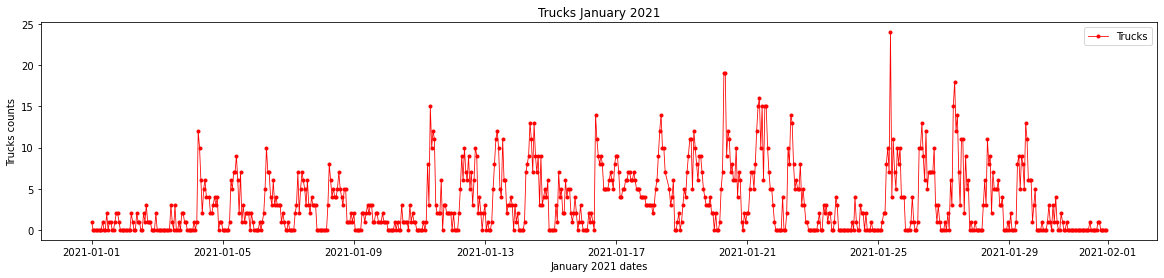

In [4]:
###############################################
###            Plot trucks Jan, 2021        ###
###############################################

plt.figure(figsize = (20,4))

plt.plot(df_2021_jan["Datum"], df_2021_jan["Lastwagen"], "r.-", label = "Trucks", lw = 0.8)


plt.title("Trucks January 2021")
plt.ylabel("Trucks counts")
plt.xlabel("January 2021 dates")
plt.legend()


plt.show()

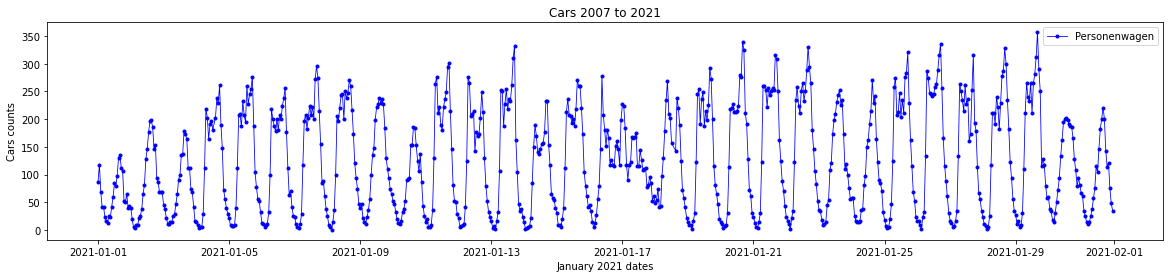

In [5]:
###############################################
###            Plot cars Jan, 2021        ###
###############################################

plt.figure(figsize = (20,4))

plt.plot(df_2021_jan["Datum"], df_2021_jan["Personenwagen"], "b.-", label = "Personenwagen", lw = 0.8)


plt.title("Cars 2007 to 2021")
plt.ylabel("Cars counts")
plt.xlabel("January 2021 dates")
plt.legend()


plt.show()

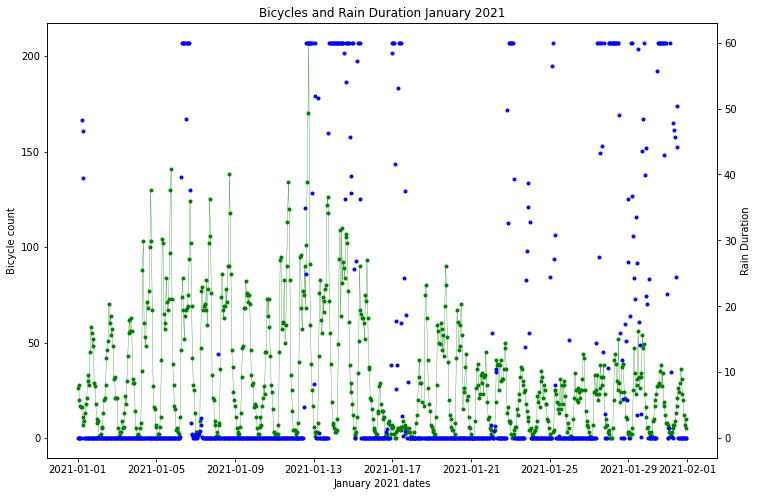

In [6]:
###############################################
###   Plot Bicycles and Rain Jan, 2021      ###
###############################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Bicycles and Rain Duration January 2021")
plt.xlabel("January 2021 dates")

ax1.plot(df_2021_jan["Datum"], df_2021_jan["Zweirad"], "g.-", label = "Bicycles", lw = 0.3)

ax2 = ax1.twinx()
ax2.plot(df_2021_jan["Datum"], df_2021_jan["RainDur"], "b.")

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Rain Duration")


plt.show()

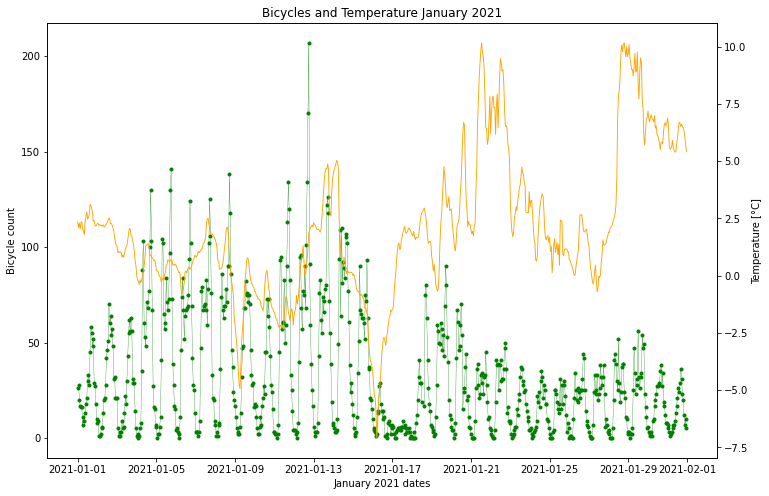

In [7]:
###############################################
### Plot Bicycles and Temperature Jan, 2021 ###
###############################################

fig, ax1 = plt.subplots(figsize = (12,8))

plt.xlabel("January 2021 dates")
plt.title("Bicycles and Temperature January 2021")

ax1.plot(df_2021_jan["Datum"], df_2021_jan["Zweirad"], "g.-", label = "Bicycles", lw = 0.3)

ax2 = ax1.twinx()
ax2.plot(df_2021_jan["Datum"], df_2021_jan["T"], color = "orange", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Temperature [°C]")


plt.show()

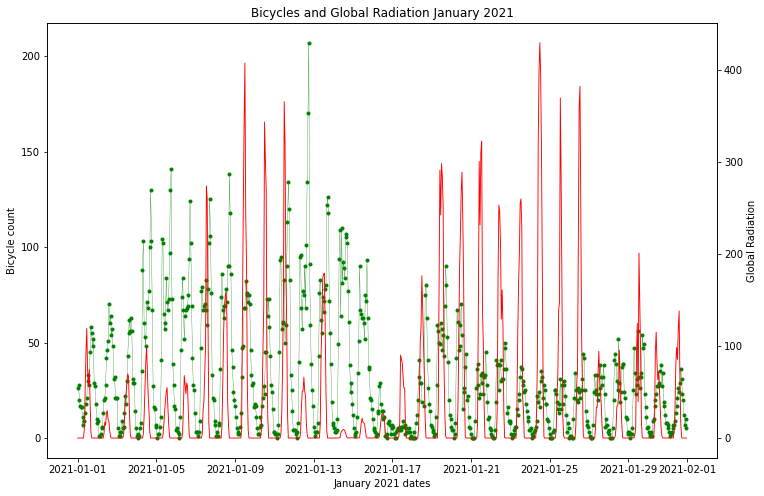

In [8]:
###############################################
###   Plot Bicycles and GlobRad Jan, 2021   ###
###############################################

fig, ax1 = plt.subplots(figsize = (12,8))

plt.xlabel("January 2021 dates")
plt.title("Bicycles and Global Radiation January 2021")

ax1.plot(df_2021_jan["Datum"], df_2021_jan["Zweirad"], "g.-", label = "Bicycles", lw = 0.3)

ax2 = ax1.twinx()
ax2.plot(df_2021_jan["Datum"], df_2021_jan["StrGlo"], color = "red", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Global Radiation")


plt.show()

# Dataframe: Full data imputed daily

In [9]:
###############################################
###               Read data                 ###
###############################################
date = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")
daily = pd.read_csv('../processed_data/full_data_imputed_daily.csv', parse_dates = ["Tagesdatum"], date_parser = date)

daily.info()
daily.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Jahr           5291 non-null   int64         
 1   Monat          5291 non-null   int64         
 2   Tag            5291 non-null   int64         
 3   Tagesdatum     5291 non-null   datetime64[ns]
 4   Zweirad        5291 non-null   int64         
 5   Personenwagen  5291 non-null   int64         
 6   Lastwagen      5291 non-null   int64         
 7   Hr             5291 non-null   float64       
 8   RainDur        5291 non-null   float64       
 9   T              5291 non-null   float64       
 10  WVs            5291 non-null   float64       
 11  StrGlo         5291 non-null   float64       
 12  p              5291 non-null   float64       
 13  NO2            5291 non-null   float64       
 14  NO             5291 non-null   float64       
 15  NOx            5291 n

Jahr        Monat          Tag      Zweirad  Personenwagen  \
count  5291.000000  5291.000000  5291.000000  5291.000000    5291.000000   
mean   2014.199584     6.539218    15.715555   907.738046    5763.749008   
std       4.258012     3.475342     8.801067   426.768712    1646.479452   
min    2007.000000     1.000000     1.000000     0.000000      40.000000   
25%    2011.000000     3.000000     8.000000   587.500000    4561.000000   
50%    2014.000000     7.000000    16.000000   881.000000    5824.000000   
75%    2018.000000    10.000000    23.000000  1202.500000    6978.000000   
max    2021.000000    12.000000    31.000000  2343.000000   10813.000000   

         Lastwagen           Hr      RainDur            T          WVs  \
count  5291.000000  5291.000000  5291.000000  5291.000000  5291.000000   
mean    200.952372    69.652694   143.812700    11.645304     1.754278   
std     110.981442    12.470988   225.966483     7.575522     0.750467   
min       0.000000    34.704000     0.000000   -10.926000     0.415000   
25%     126.000000    60.729000     0.000000     5.507500     1.255000   
50%     200.000000    70.998000    16.320000    11.536000     1.590000   
75%     267.000000    79.411000   220.615000    17.674500     2.040000   
max    1164.000000    96.181000  1438.830000    30.029000     7.194000   

            StrGlo            p          NO2           NO          NOx  \
count  5291.000000  5291.000000  5291.000000  5291.000000  5291.000000   
mean    134.948471   966.577033    31.594391    17.157687    30.277691   
std      97.136269     7.486331    14.670006    19.496135    22.083455   
min       0.000000   931.225000     4.829000     0.436000     3.192000   
25%      50.204000   962.510500    20.370000     5.396500    15.043500   
50%     112.565000   966.995000    29.739000    10.603000    24.312000   
75%     212.749000   971.163500    40.578000    21.056000    38.531000   
max     363.274000   989.913000    96.513000   210.047000   215.502000   

                O3           CO         PM10          SO2  
count  5291.000000  5291.000000  5291.000000  5291.000000  
mean     44.093782     0.351709    18.918441     1.943136  
std      24.955208     0.151347    11.230981     1.588407  
min       0.771000     0.066000     0.932000    -0.023000  
25%      23.085500     0.250000    11.216500     1.055000  
50%      45.965000     0.315000    16.205000     1.458000  
75%      62.186500     0.416000    23.627000     2.230000  
max     126.207000     1.393000    91.516000    16.881000

Comment: The date was in a "object" format, so I corrected it with the datetime format.

### DAILY: Vehicle counts over the years

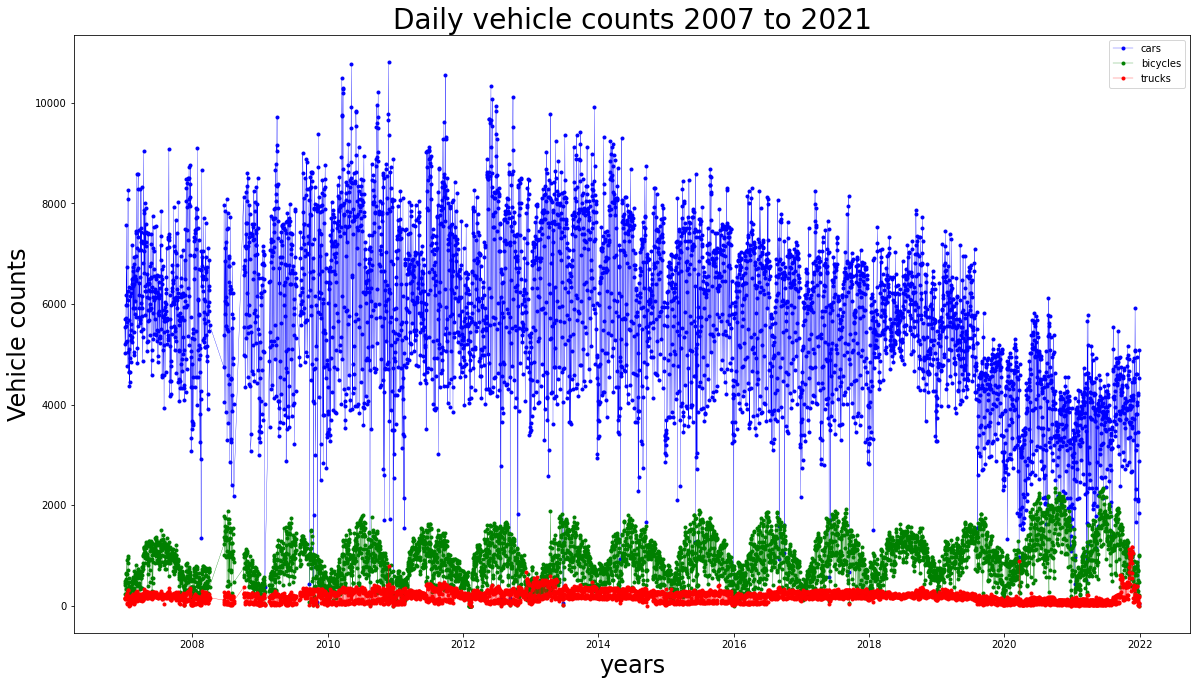

In [10]:
###########################################################
### Plot daily cars, trucks and bycicles over the years ###
###########################################################

plt.figure(figsize = (20,11))


plt.plot(daily["Tagesdatum"], daily["Personenwagen"], "b.-", label = "cars", lw = 0.3)
plt.plot(daily["Tagesdatum"], daily["Zweirad"], "g.-", label = "bicycles", lw = 0.3)
plt.plot(daily["Tagesdatum"], daily["Lastwagen"], "r.-", label = "trucks", lw = 0.3)


plt.title("Daily vehicle counts 2007 to 2021", fontsize = 28)
plt.ylabel("Vehicle counts", fontsize = 24)
plt.xlabel("years", fontsize = 24)
plt.legend()


plt.show()

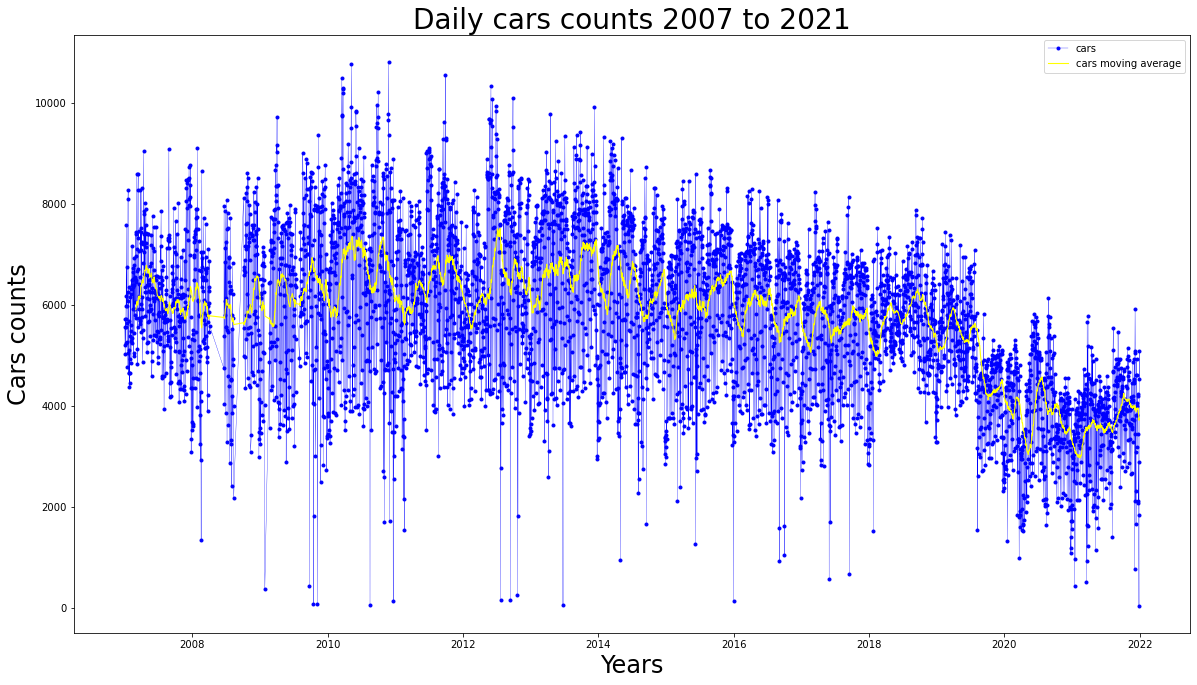

In [11]:
###############################################
###      daily cars counts over the year    ###
###############################################

plt.figure(figsize = (20,11))


daily["ma_c"] = daily["Personenwagen"].rolling(window=60).mean()


plt.plot(daily["Tagesdatum"], daily["Personenwagen"], "b.-", label = "cars", lw = 0.3)
plt.plot(daily["Tagesdatum"], daily["ma_c"], label = "cars moving average", lw = 1.1, color = "yellow")


plt.title("Daily cars counts 2007 to 2021", fontsize = 28)
plt.ylabel("Cars counts", fontsize = 24)
plt.xlabel("Years", fontsize = 24)
plt.legend()


plt.show()

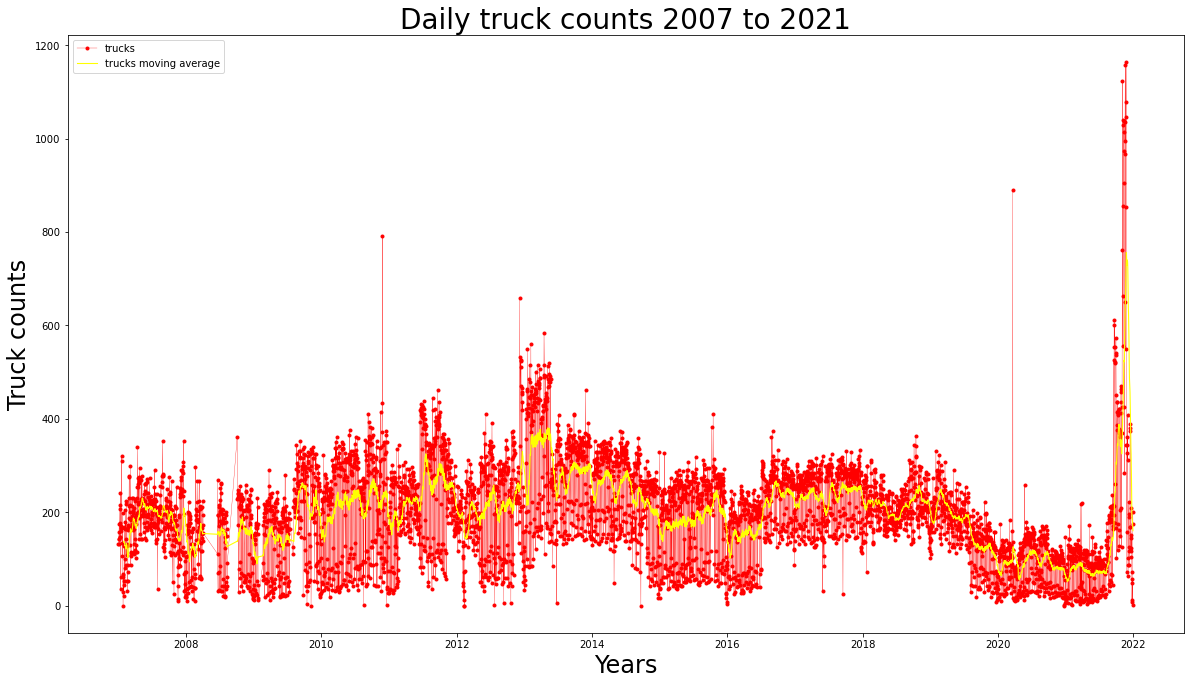

In [12]:
###############################################
###     daily trucks counts over the year   ###
###############################################

plt.figure(figsize = (20,11))


daily["ma_t"] = daily["Lastwagen"].rolling(window=30).mean()

plt.plot(daily["Tagesdatum"], daily["Lastwagen"], "r.-", label = "trucks", lw = 0.3)
plt.plot(daily["Tagesdatum"], daily["ma_t"], label = "trucks moving average", lw = 1.1, color = "yellow")


plt.title("Daily truck counts 2007 to 2021", fontsize = 28)
plt.ylabel("Truck counts", fontsize = 24)
plt.xlabel("Years", fontsize = 24)
plt.legend()


plt.show()

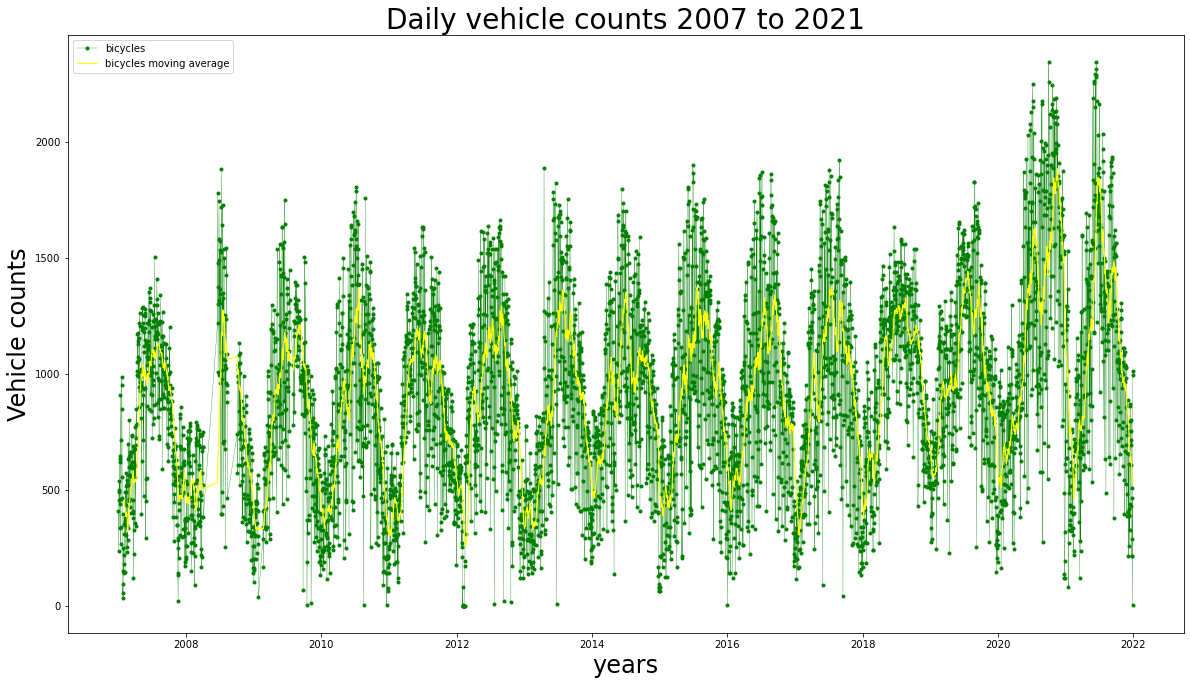

In [13]:
###############################################
###   daily bicycles counts over the year   ###
###############################################
plt.figure(figsize = (20,11))


daily["ma_b"] = daily["Zweirad"].rolling(window=30).mean()

plt.plot(daily["Tagesdatum"], daily["Zweirad"], "g.-", label = "bicycles", lw = 0.3)
plt.plot(daily["Tagesdatum"], daily["ma_b"], label = "bicycles moving average", lw = 1.1, color = "yellow")


plt.title("Daily vehicle counts 2007 to 2021", fontsize = 28)
plt.ylabel("Vehicle counts", fontsize = 24)
plt.xlabel("years", fontsize = 24)
plt.legend()


plt.show()

Comment:
Every day has a count with car, truck and bicycle counts. There are some values missing in 2008 and 2009.

### DAILY: Vehicle counts troughout the months

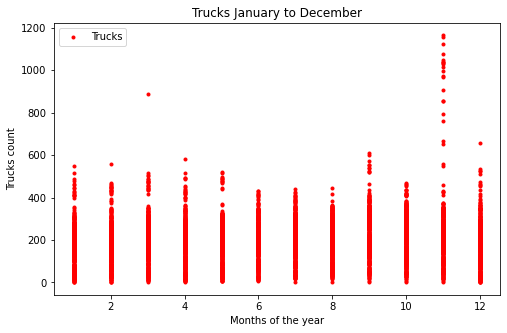

In [14]:
###############################################
###      Trucks in month of the years       ###
###############################################

plt.figure(figsize = (8,5))

plt.plot(daily["Monat"], daily["Lastwagen"], "r.", label = "Trucks")

plt.title("Trucks January to December")
plt.ylabel("Trucks count")
plt.xlabel("Months of the year")
plt.legend()

plt.show()

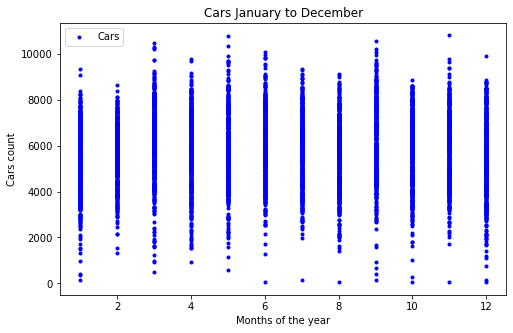

In [15]:
###############################################
###       Cars in month of the years        ###
###############################################

plt.figure(figsize = (8,5))

plt.plot(daily["Monat"], daily["Personenwagen"], "b.", label = "Cars")

plt.title("Cars January to December")
plt.ylabel("Cars count")
plt.xlabel("Months of the year")
plt.legend()

plt.show()

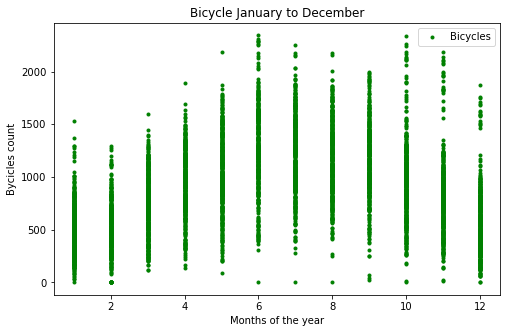

In [16]:
###############################################
###      Bicycles in month of the years     ###
###############################################
plt.figure(figsize = (8,5))

plt.plot(daily["Monat"], daily["Zweirad"], "g.", label = "Bicycles")

plt.title("Bicycle January to December")
plt.ylabel("Bycicles count")
plt.xlabel("Months of the year")
plt.legend()

plt.show()

### DAILY: Airquality over the years

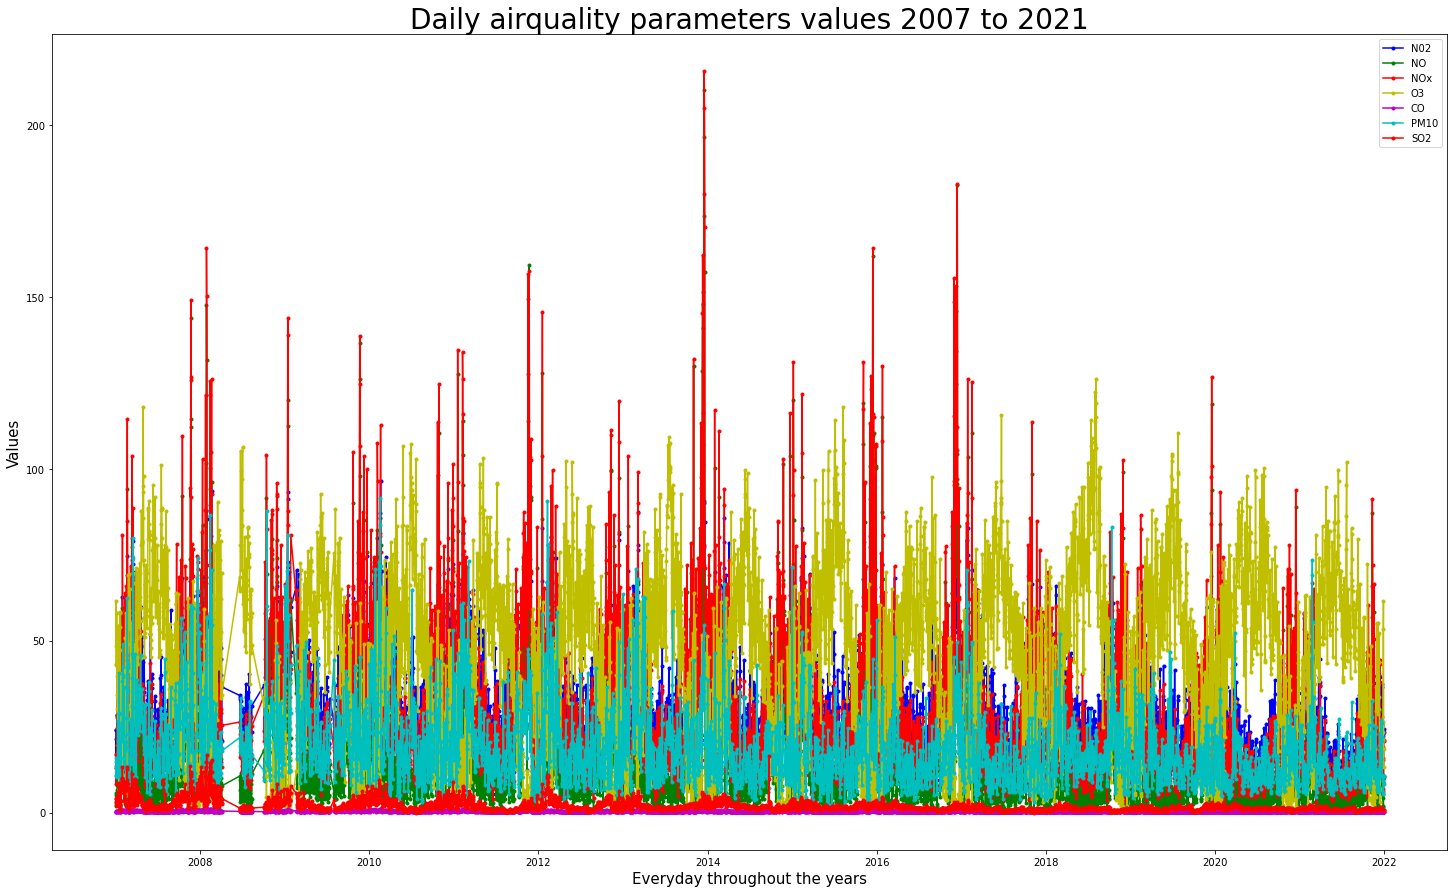

In [17]:
###############################################
###     Airquality data over the years      ###
###############################################

# x axis years (or mean of years)
plt.figure(figsize = (25,15))

plt.plot(daily["Tagesdatum"], daily["NO2"], "b.-", label = "N02")
plt.plot(daily["Tagesdatum"], daily["NO"], "g.-", label = "NO")
plt.plot(daily["Tagesdatum"], daily["NOx"], "r.-", label = "NOx")
plt.plot(daily["Tagesdatum"], daily["O3"], "y.-", label = "O3")
plt.plot(daily["Tagesdatum"], daily["CO"], "m.-", label = "CO")
plt.plot(daily["Tagesdatum"], daily["PM10"], "c.-", label = "PM10")
plt.plot(daily["Tagesdatum"], daily["SO2"], "r.-", label = "SO2")


plt.title("Daily airquality parameters values 2007 to 2021", fontsize = 28)
plt.ylabel("Values", fontsize = 15)
plt.xlabel("Everyday throughout the years", fontsize = 15)
plt.legend()


plt.show()

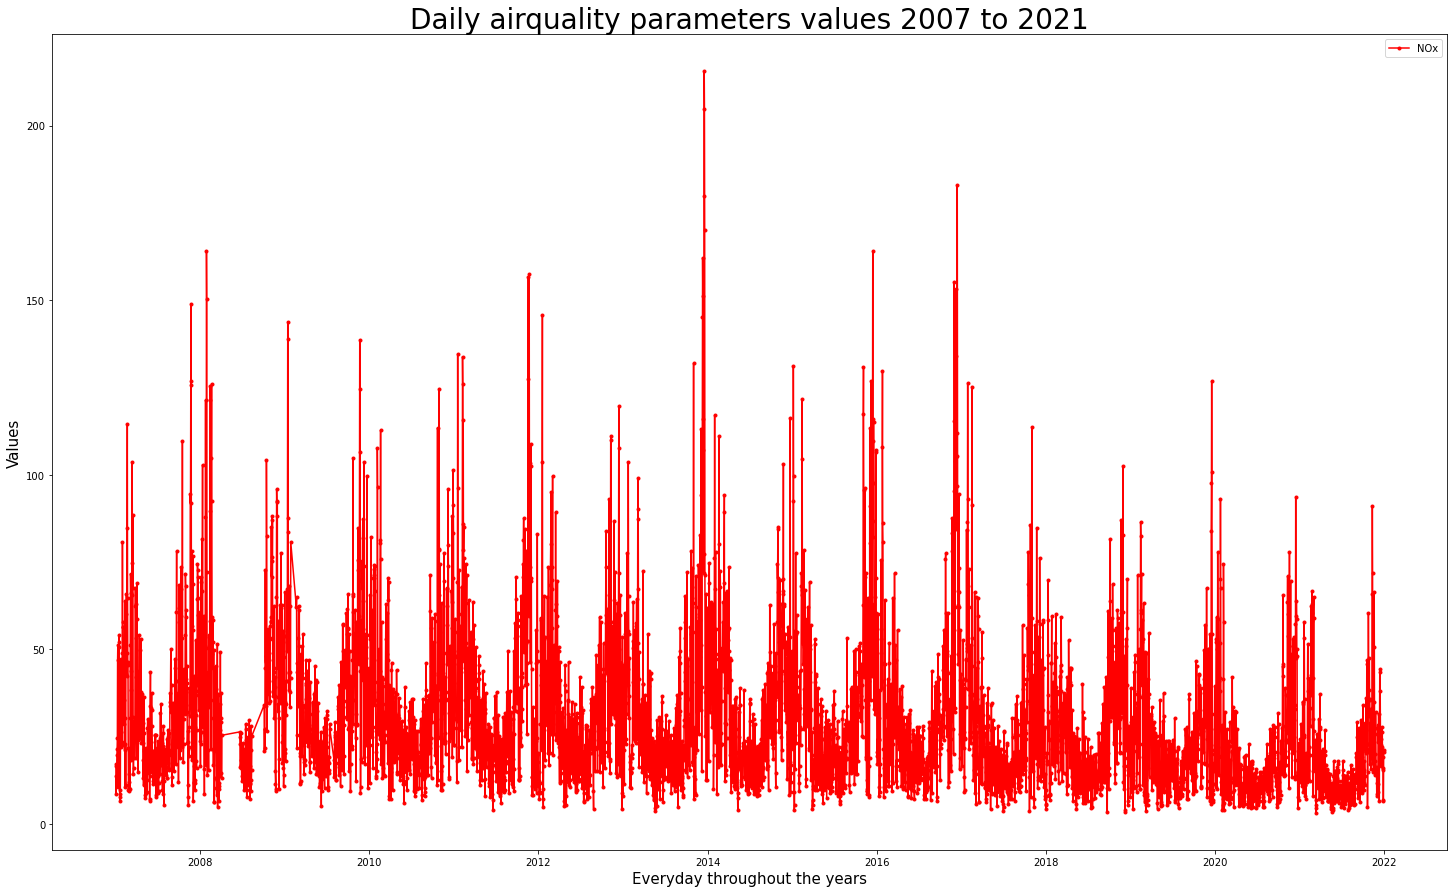

In [18]:
####################
###     NOx      ###
####################
# x axis years (or mean of years)


plt.figure(figsize = (25,15))

plt.plot(daily["Tagesdatum"], daily["NOx"], "r.-", label = "NOx")


plt.title("Daily airquality parameters values 2007 to 2021", fontsize = 28)
plt.ylabel("Values", fontsize = 15)
plt.xlabel("Everyday throughout the years", fontsize = 15)
plt.legend()


plt.show()

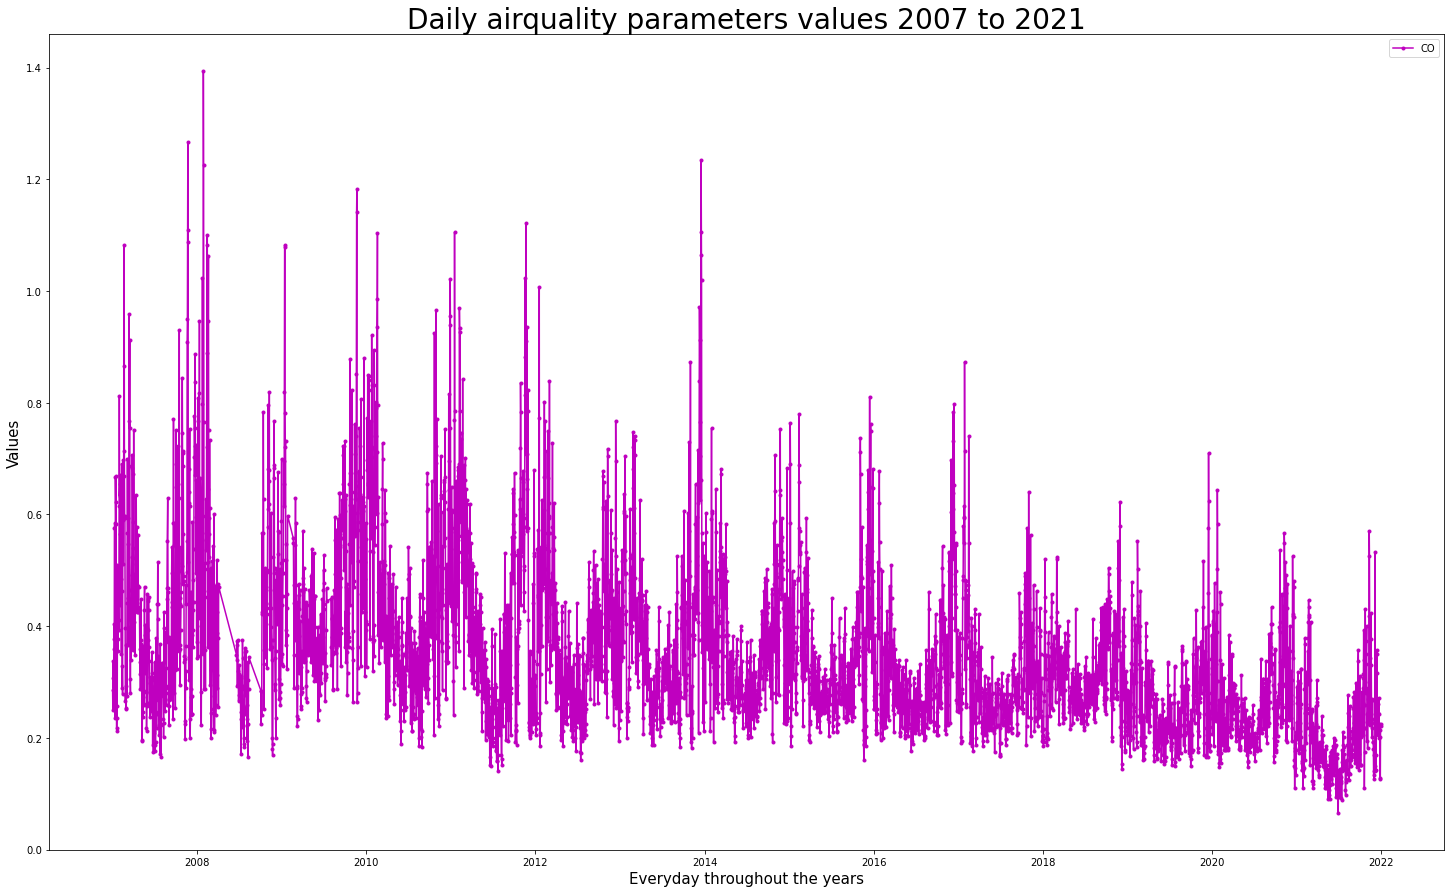

In [19]:
####################
###      CO      ###
####################


plt.figure(figsize = (25,15))


plt.plot(daily["Tagesdatum"], daily["CO"], "m.-", label = "CO")


plt.title("Daily airquality parameters values 2007 to 2021", fontsize = 28)
plt.ylabel("Values", fontsize = 15)
plt.xlabel("Everyday throughout the years", fontsize = 15)
plt.legend()


plt.show()

### DAILY: Weather samples

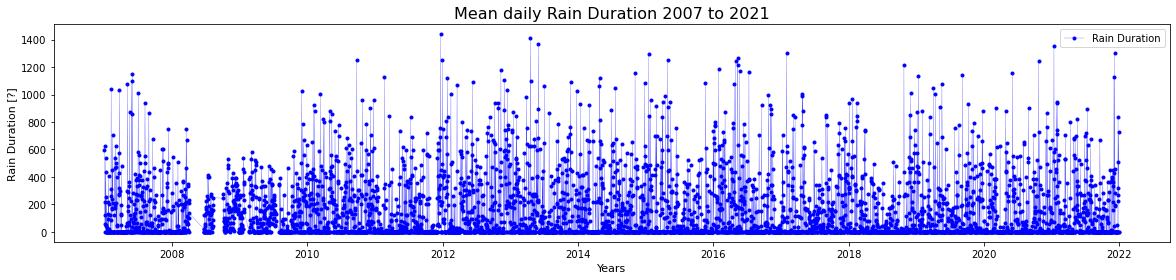

In [20]:
####################
###     Rain     ###
####################


plt.figure(figsize = (20,4))

plt.plot(daily.Tagesdatum, daily.RainDur, "b.-", label = "Rain Duration", lw = 0.2)

plt.title("Mean daily Rain Duration 2007 to 2021", fontsize = 16)
plt.ylabel("Rain Duration [?]", fontsize = 11)
plt.xlabel("Years", fontsize = 11)
plt.legend()


plt.show()

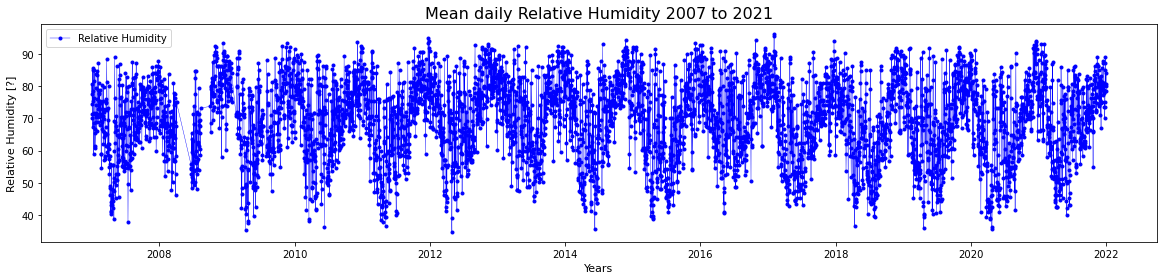

In [21]:
####################
###   Humidity   ###
####################

plt.figure(figsize = (20,4))

plt.plot(daily.Tagesdatum, daily.Hr, "b.-", label = "Relative Humidity", lw = 0.4)

plt.title("Mean daily Relative Humidity 2007 to 2021", fontsize = 16)
plt.ylabel("Relative Humidity [?]", fontsize = 11)
plt.xlabel("Years", fontsize = 11)
plt.legend()


plt.show()

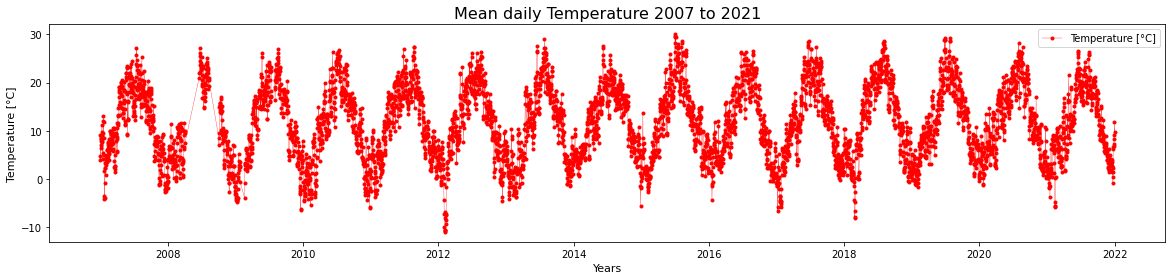

In [22]:
####################
###  Temperature ###
####################

plt.figure(figsize = (20,4))

plt.plot(daily.Tagesdatum, daily["T"], "r.-", label = "Temperature [°C]", lw = 0.3)

plt.title("Mean daily Temperature 2007 to 2021", fontsize = 16)
plt.ylabel("Temperature [°C]", fontsize = 11)
plt.xlabel("Years", fontsize = 11)
plt.legend()


plt.show()

### DAILY: Vehicle and Weather data in 2021

In [23]:
###############################################
###          Filter data Jan 2021           ###
###############################################

daily_2021 = daily[daily.Jahr == 2021]


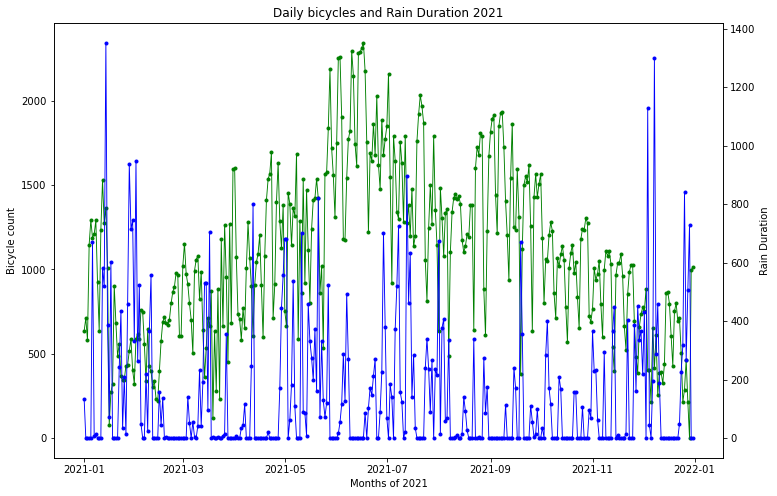

In [24]:
###############################################
###        Bicycles and rain duration       ###
###############################################

fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Rain Duration 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.9)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["RainDur"], "b.-", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Rain Duration")

plt.show()

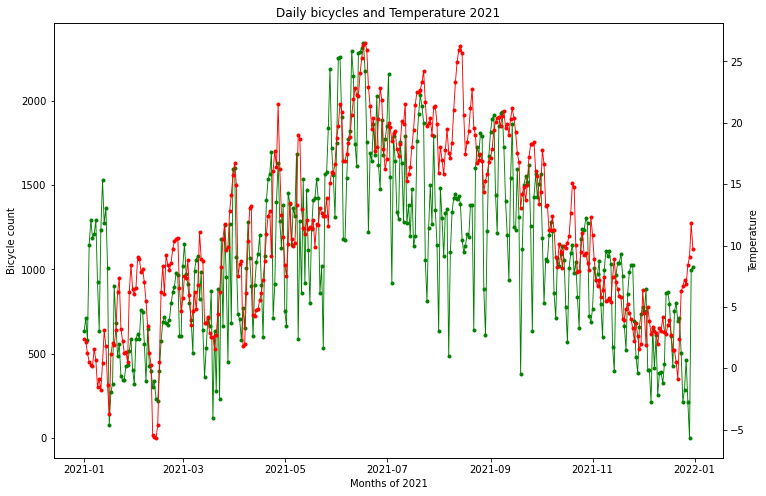

In [25]:
###############################################
###       Bicycles and Tmperature daily     ###
###############################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Temperature 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.9)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["T"], "r.-", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Temperature")

plt.show()

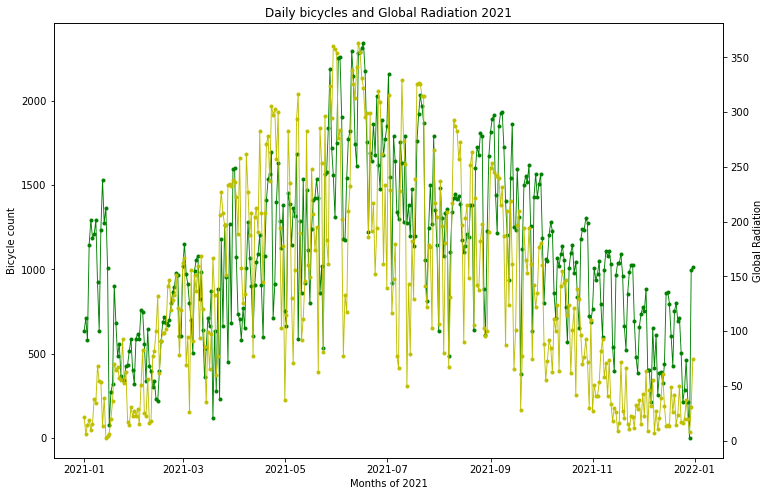

In [26]:
###############################################
###      Bicycles and Global Rad. daily     ###
###############################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Global Radiation 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.9)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["StrGlo"], "y.-", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Global Radiation")

plt.show()

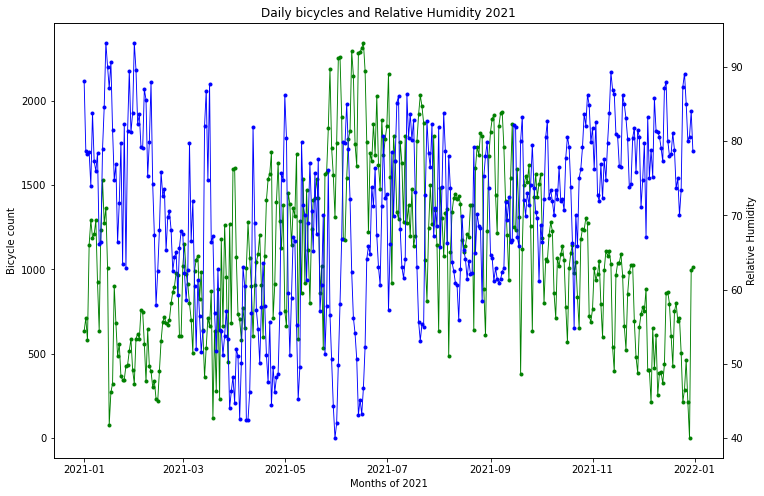

In [27]:
###############################################
###      Bicycles and Rel. Humid. daily     ###
###############################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Relative Humidity 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.9)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["Hr"], "b.-", lw = 0.9)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Relative Humidity")

plt.show()

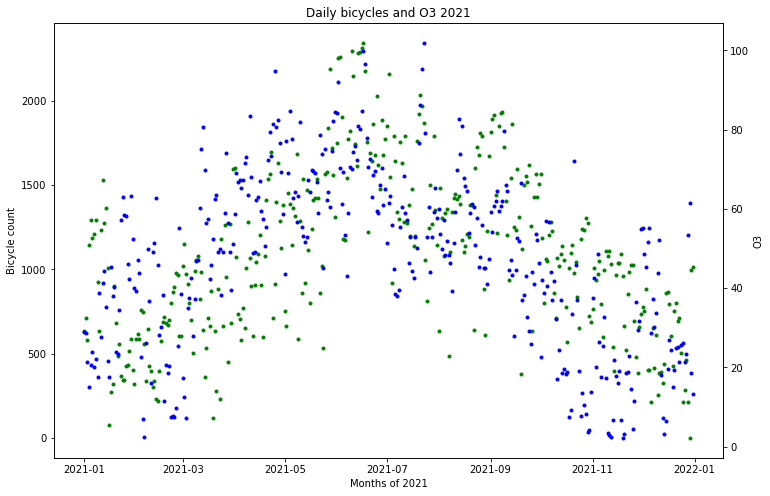

In [28]:
##################################
###    Bicycles and O3 daily   ###
##################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and O3 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.", label = "Bicycles", lw = 0.7)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["O3"], "b.", lw = 0.7)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("O3")

plt.show()

### DAILY: Vehicles relationship in 2021

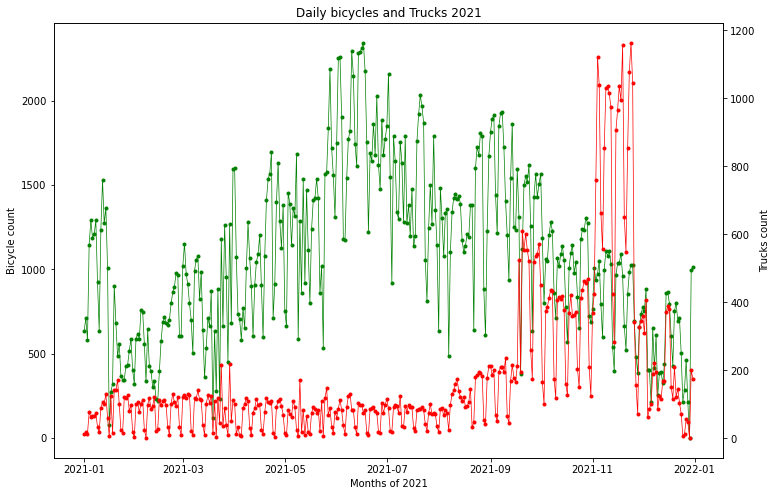

In [29]:
###########################################
###    Bicycles and Trucks daily 2021   ###
###########################################
fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Trucks 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.7)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["Lastwagen"], "r.-", lw = 0.7)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Trucks count")

plt.show()

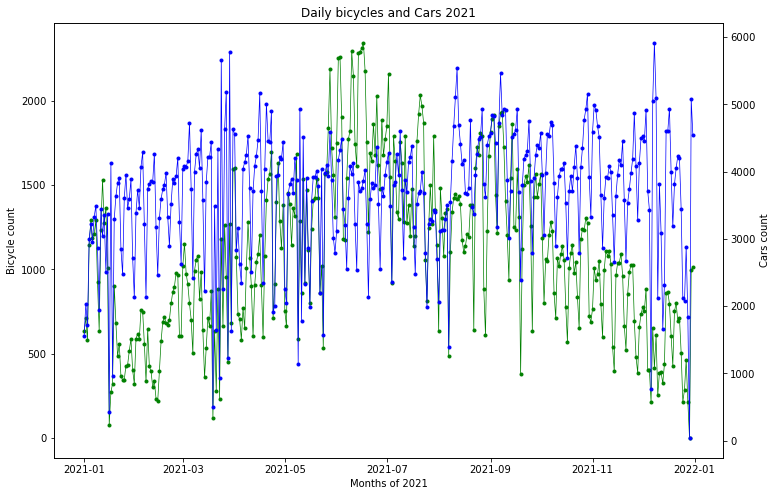

In [30]:
###########################################
###    Bicycles and Cars daily 2021     ###
###########################################

fig, ax1 = plt.subplots(figsize = (12,8))

plt.title("Daily bicycles and Cars 2021")
plt.xlabel("Months of 2021")

ax1.plot(daily_2021["Tagesdatum"], daily_2021["Zweirad"], "g.-", label = "Bicycles", lw = 0.7)

ax2 = ax1.twinx()
ax2.plot(daily_2021["Tagesdatum"], daily_2021["Personenwagen"], "b.-", lw = 0.7)

ax1.set_ylabel("Bicycle count")
ax2.set_ylabel("Cars count")

plt.show()

# Dataframe: Yearly means

In [31]:
###########################################
###         Read data yearly_means      ###
###########################################

yearly = pd.read_table('../processed_data/yearly_means.csv', sep = ";")

yearly.info()
yearly.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jahr           15 non-null     int64  
 1   Zweirad        15 non-null     float64
 2   Personenwagen  15 non-null     float64
 3   Lastwagen      15 non-null     float64
 4   Hr             15 non-null     float64
 5   RainDur        15 non-null     float64
 6   T              15 non-null     float64
 7   WVs            15 non-null     float64
 8   StrGlo         15 non-null     float64
 9   p              15 non-null     float64
 10  NO2            15 non-null     float64
 11  NO             15 non-null     float64
 12  NOx            15 non-null     float64
 13  O3             15 non-null     float64
 14  CO             15 non-null     float64
 15  PM10           15 non-null     float64
 16  SO2            15 non-null     float64
dtypes: float64(16), int64(1)
memory usage: 2.1 KB


Jahr      Zweirad  Personenwagen   Lastwagen         Hr  \
count    15.000000    15.000000      15.000000   15.000000  15.000000   
mean   2014.000000   901.840985    5774.055866  199.374736  69.689339   
std       4.472136   130.766478     942.606933   49.136460   1.714663   
min    2007.000000   701.632479    3671.498630   91.494536  66.277336   
25%    2010.500000   820.877165    5673.707989  177.256868  68.782407   
50%    2014.000000   897.827869    6131.975342  195.581967  69.779365   
75%    2017.500000   947.878535    6358.266011  228.397260  71.153318   
max    2021.000000  1219.502732    6698.805479  303.556164  72.150014   

          RainDur          T        WVs      StrGlo           p        NO2  \
count   15.000000  15.000000  15.000000   15.000000   15.000000  15.000000   
mean   143.308834  11.589675   1.751913  134.240925  966.615703  31.794801   
std     21.834180   0.912309   0.124809   11.623677    1.380389   5.028481   
min    114.302231   9.310534   1.550967  106.341098  963.616707  21.987808   
25%    127.201155  11.297030   1.657657  130.084619  965.748956  29.446566   
50%    137.223353  11.741404   1.707760  136.082642  966.719940  33.550071   
75%    161.614479  12.167200   1.868247  142.557904  967.545250  35.346302   
max    186.140000  12.842848   1.977478  146.977992  968.731852  37.645192   

              NO        NOx         O3         CO       PM10        SO2  
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000  
mean   17.347360  30.534560  43.888918   0.354812  19.091375   1.993661  
std     4.487211   6.099157   3.810037   0.076736   3.747931   0.890059  
min     9.014151  18.725151  36.487996   0.206762  13.783060   1.054433  
25%    13.641558  26.335481  41.387811   0.305660  15.997160   1.262443  
50%    19.071298  32.966315  43.350696   0.360378  17.983590   1.835052  
75%    20.375411  34.275312  46.101100   0.423935  22.294892   2.368904  
max    23.990013  38.919585  51.213669   0.460003  24.262440   3.858496

Comment: This dataset contains the daily means for the samples from every year (2007-2021). There is one value per sample and year, which shows the daily average (not the count of the years).

### YEARLY: Vehicles over the years

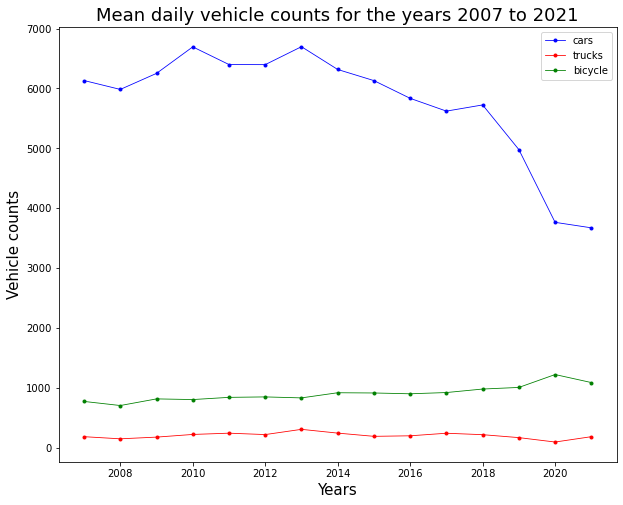

In [32]:
###########################################
###  Daily mean vehicles for the years  ###
###########################################

plt.figure(figsize = (10,8))

plt.plot(yearly.Jahr, yearly.Personenwagen, "b.-", label = "cars", lw = 0.8)
plt.plot(yearly.Jahr, yearly.Lastwagen, "r.-", label = "trucks", lw = 0.8)
plt.plot(yearly.Jahr, yearly.Zweirad, "g.-", label = "bicycle", lw = 0.8)


plt.title("Mean daily vehicle counts for the years 2007 to 2021", fontsize = 18)
plt.ylabel("Vehicle counts", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.legend()


plt.show()

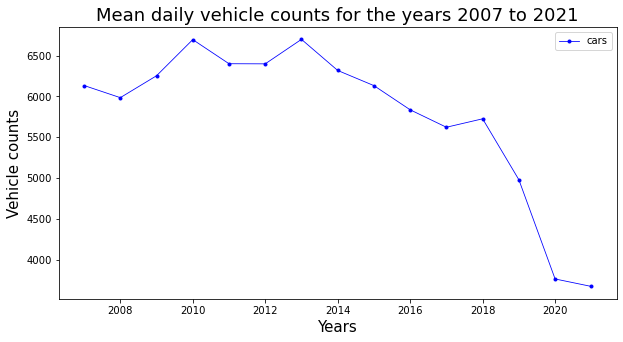

In [33]:
###########################################
###    Daily mean cars for the years    ###
###########################################
plt.figure(figsize = (10,5))

plt.plot(yearly.Jahr, yearly.Personenwagen, "b.-", label = "cars", lw = 0.8)

plt.title("Mean daily vehicle counts for the years 2007 to 2021", fontsize = 18)
plt.ylabel("Vehicle counts", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.legend()


plt.show()

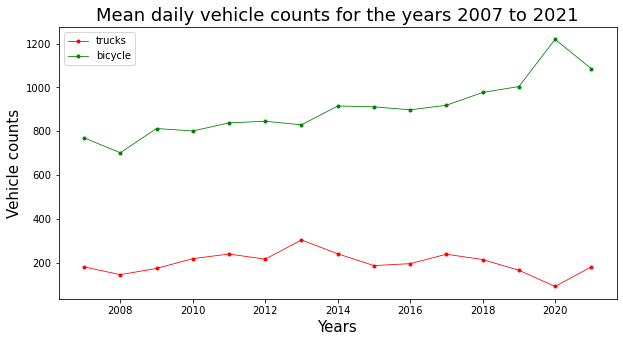

In [34]:
###########################################
###  Daily mean vehicles for the years  ###
###########################################

plt.figure(figsize = (10,5))

plt.plot(yearly.Jahr, yearly.Lastwagen, "r.-", label = "trucks", lw = 0.8)
plt.plot(yearly.Jahr, yearly.Zweirad, "g.-", label = "bicycle", lw = 0.8)

plt.title("Mean daily vehicle counts for the years 2007 to 2021", fontsize = 18)
plt.ylabel("Vehicle counts", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.legend()


plt.show()

### YEARLY: Airquality data counts

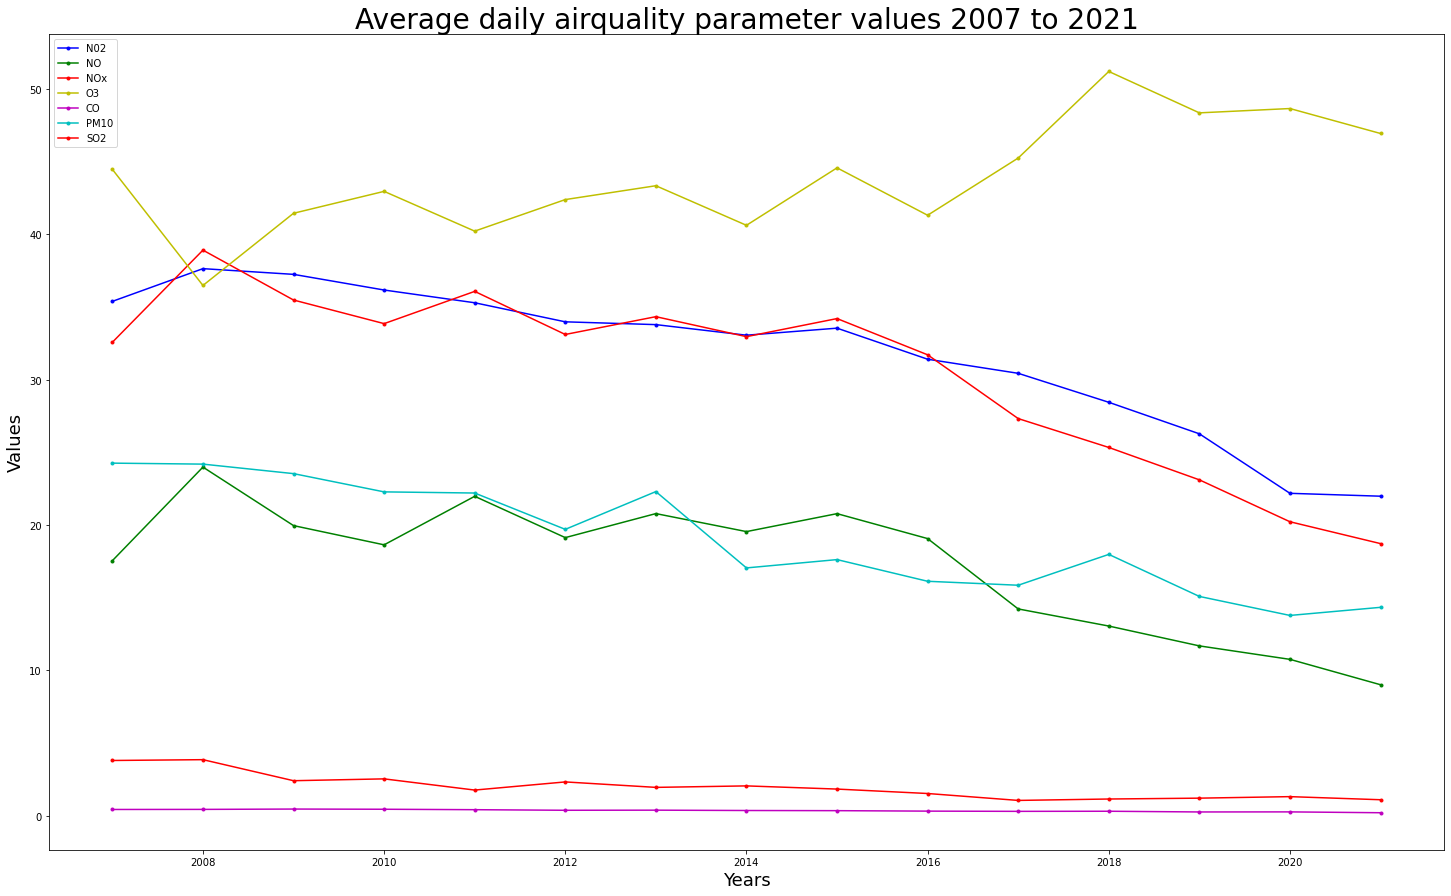

In [35]:
###########################################
###    Airquality data over the years   ###
###########################################

# x axis years (or mean of years)
plt.figure(figsize = (25,15))

plt.plot(yearly["Jahr"], yearly["NO2"], "b.-", label = "N02")
plt.plot(yearly["Jahr"], yearly["NO"], "g.-", label = "NO")
plt.plot(yearly["Jahr"], yearly["NOx"], "r.-", label = "NOx")
plt.plot(yearly["Jahr"], yearly["O3"], "y.-", label = "O3")
plt.plot(yearly["Jahr"], yearly["CO"], "m.-", label = "CO")
plt.plot(yearly["Jahr"], yearly["PM10"], "c.-", label = "PM10")
plt.plot(yearly["Jahr"], yearly["SO2"], "r.-", label = "SO2")


plt.title("Average daily airquality parameter values 2007 to 2021", fontsize = 28)
plt.ylabel("Values", fontsize = 18)
plt.xlabel("Years", fontsize = 18)
plt.legend()


plt.show()

### YEARLY: Weather data

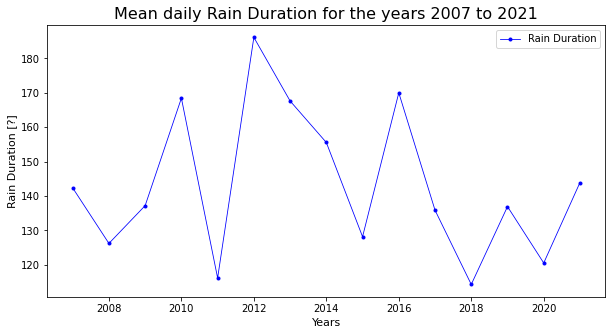

In [36]:
#############################
###    Yearly rain data   ###
#############################

plt.figure(figsize = (10,5))

plt.plot(yearly.Jahr, yearly.RainDur, "b.-", label = "Rain Duration", lw = 0.8)

plt.title("Mean daily Rain Duration for the years 2007 to 2021", fontsize = 16)
plt.ylabel("Rain Duration [?]", fontsize = 11)
plt.xlabel("Years", fontsize = 11)
plt.legend()


plt.show()

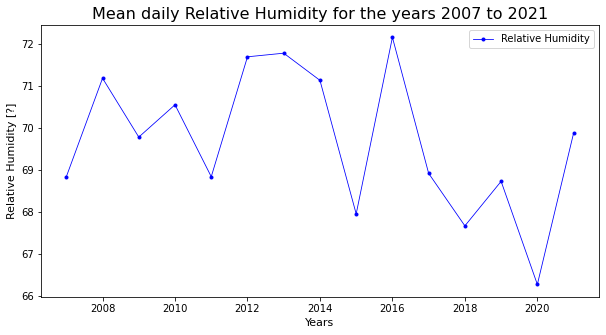

In [37]:
#############################
###  Yearly Rel. Humid.   ###
#############################

plt.figure(figsize = (10,5))

plt.plot(yearly.Jahr, yearly.Hr, "b.-", label = "Relative Humidity", lw = 0.8)

plt.title("Mean daily Relative Humidity for the years 2007 to 2021", fontsize = 16)
plt.ylabel("Relative Humidity [?]", fontsize = 11)
plt.xlabel("Years", fontsize = 11)
plt.legend()


plt.show()

## Relationships between samples

### RELATIONSHIP: Vehicles 

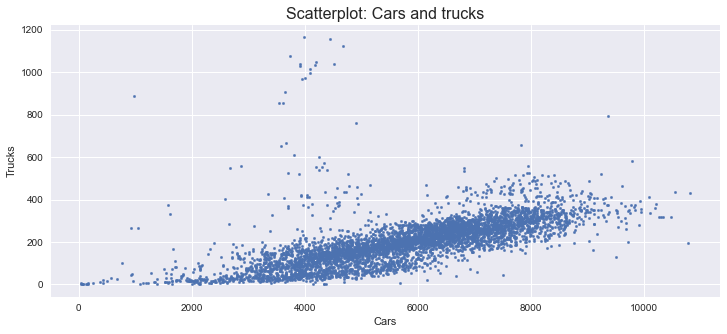

In [38]:
#############################
###  Cars with Trucks     ###
#############################

plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(daily["Personenwagen"], daily["Lastwagen"], s = 6)

plt.title("Scatterplot: Cars and trucks", fontsize = 16)
plt.ylabel("Trucks")
plt.xlabel("Cars")

plt.show()

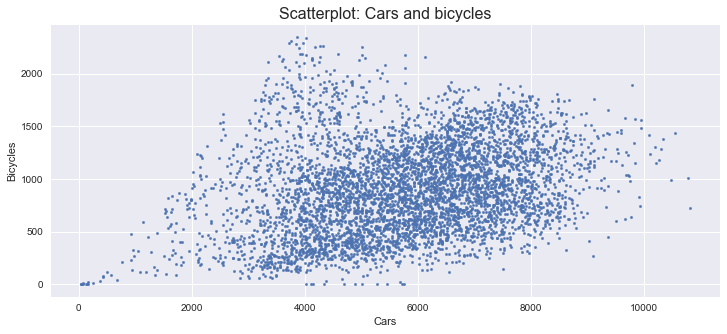

In [39]:
#############################
###  Cars with Bicycles   ###
#############################

plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(daily["Personenwagen"], daily["Zweirad"], s = 6)

plt.title("Scatterplot: Cars and bicycles", fontsize = 16)
plt.ylabel("Bicycles")
plt.xlabel("Cars")

plt.show()

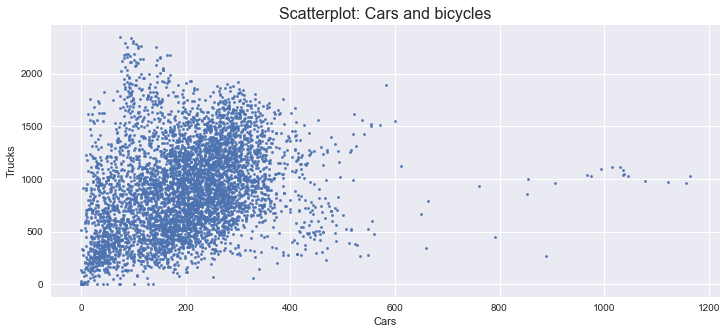

In [40]:
#############################
###  Trucks with Bicycles ###
#############################

plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(daily["Lastwagen"], daily["Zweirad"], s = 6)

plt.title("Scatterplot: Cars and bicycles", fontsize = 16)
plt.ylabel("Trucks")
plt.xlabel("Cars")

plt.show()

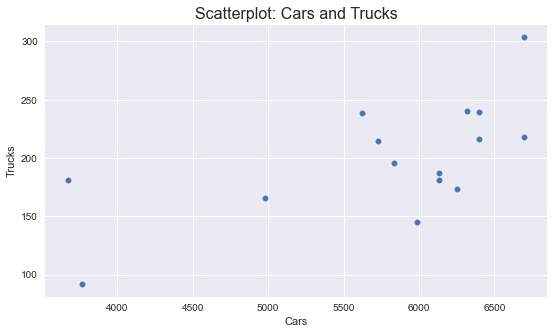

In [41]:
#################################
###  Cars with Trucks yearly  ###
#################################

plt.figure(figsize = (9,5))

plt.scatter(yearly["Personenwagen"], yearly["Lastwagen"], s = 30)

plt.title("Scatterplot: Cars and Trucks", fontsize = 16)
plt.ylabel("Trucks")
plt.xlabel("Cars")

plt.show()

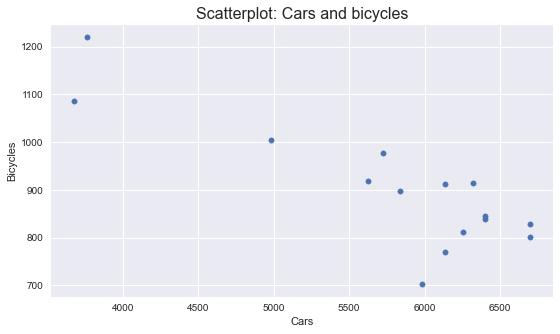

In [42]:
#################################
### Cars with Bicycles yearly ###
#################################
plt.style.use("seaborn")

plt.figure(figsize = (9,5))

plt.scatter(yearly["Personenwagen"], yearly["Zweirad"], s = 30)

plt.title("Scatterplot: Cars and bicycles", fontsize = 16)
plt.ylabel("Bicycles")
plt.xlabel("Cars")

plt.show()

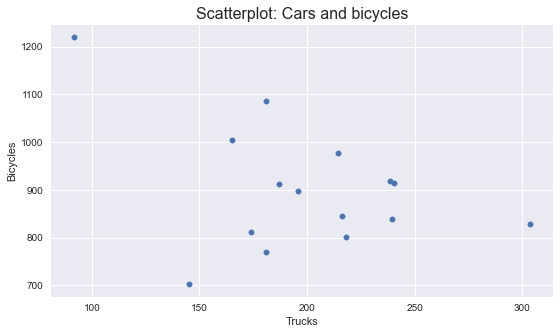

In [43]:
###################################
### Trucks with Bicycles yearly ###
###################################

plt.style.use("seaborn")

plt.figure(figsize = (9,5))

plt.scatter(yearly["Lastwagen"], yearly["Zweirad"], s = 30)

plt.title("Scatterplot: Cars and bicycles", fontsize = 16)
plt.ylabel("Bicycles")
plt.xlabel("Trucks")

plt.show()

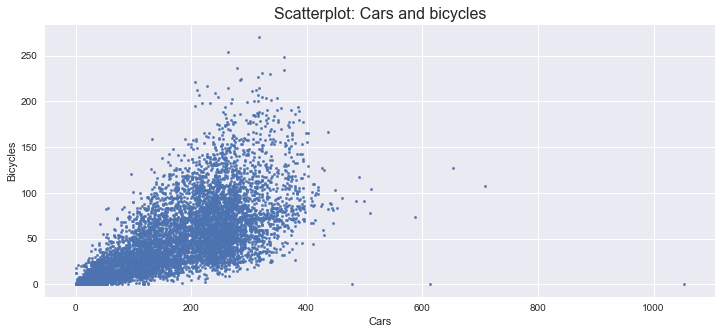

In [44]:
#################################
###   Cars with Bicycles 2021 ###
#################################

plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(df_2021["Personenwagen"], df_2021["Zweirad"], s = 6)

plt.title("Scatterplot: Cars and bicycles", fontsize = 16)
plt.ylabel("Bicycles")
plt.xlabel("Cars")

plt.show()

### RELATIONSHIP: Vehicles and Airquality data 

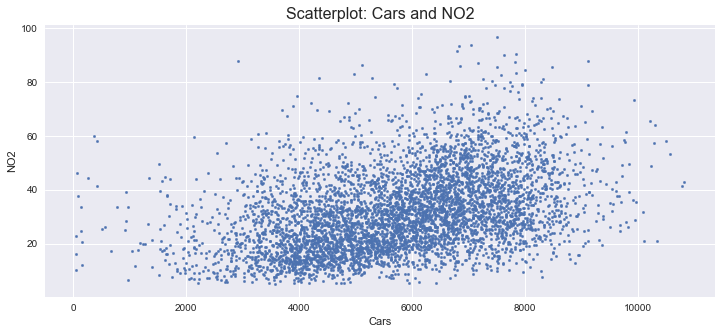

In [45]:
#####################
### Cars with No2 ###
#####################
plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(daily["Personenwagen"], daily["NO2"], s = 6)

plt.title("Scatterplot: Cars and NO2", fontsize = 16)
plt.ylabel("NO2")
plt.xlabel("Cars")

plt.show()

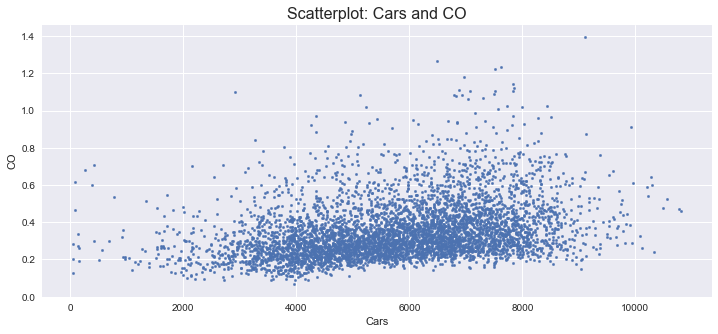

In [46]:
#####################
###  Cars with CO ###
#####################

plt.style.use("seaborn")

plt.figure(figsize = (12,5))

plt.scatter(daily["Personenwagen"], daily["CO"], s = 6)

plt.title("Scatterplot: Cars and CO", fontsize = 16)
plt.ylabel("CO")
plt.xlabel("Cars")

plt.show()